## Importing Libraries

In [1]:
import numpy as np
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.datasets import fetch_california_housing
%matplotlib inline

Let's load the california_housing dataset
- Target is to predict the `Median House Price` based of some features.
- Features: `AveRooms`, `AveBedrims`, `Populatoin`, etc

In [2]:
# Loading dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns= data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Available Features

In [3]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

Let's seperate independent features / variables from the dependent / target variable

In [4]:
# Seperate target and features
X = df.drop('MedInc', axis=1)
y = df['MedInc']

X.head()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


It is best to seperate our dataset into train and test set...using Scikit-learn.

In [5]:
# Seperate dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

(14448, 7) (6192, 7)


## Correlated Features

- We can identify correlated features by calculating correlation matrix.
- If some feature is highly correlated with the dependent variable, we shouldn't remove it.
- If some individual features are highly correlated we can remove one them...as it leads `Multi-correlation`
    - But the caveat is models might locks the contribution of each individual feature for the task at hand,
    - The individual feature indirectly could impact for the performance of the model.
    - So we could end up with dillema which feature to remove...
    - Better approach would be to use the domain knowledge and then might need to go for empirical reasoning...

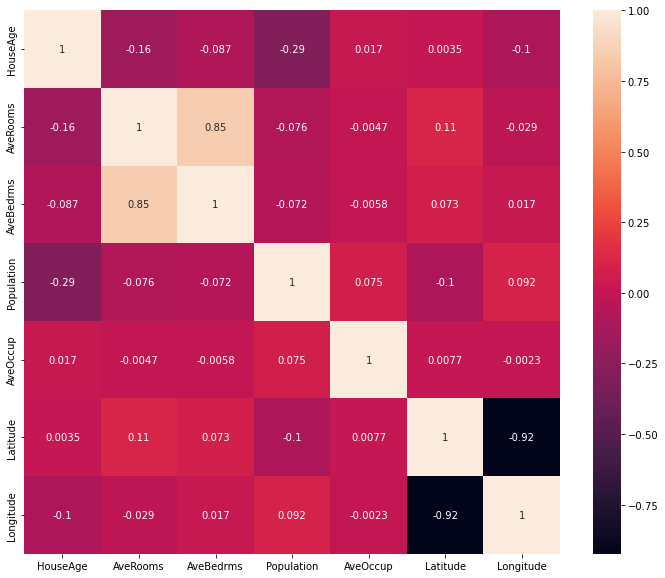

In [6]:
import seaborn as sns

# Using Pearson Correlation
plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True,)
plt.show()

## Removing Highly Correlated Features

- Here we just remove the first feature that is highly correlated with any other one.
- Use domain knowledge and empirical test results when removing features.

In [7]:
# We can select highly correlated features
# remove the first feature that is correlated with any other feature

def correlation(dataset, threshold):
    col_corr = set() # set of all the names of correlated features
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] )> threshold:
                col = corr_matrix.columns[i] # getting the name of the column
                col_corr.add(col)
                
    return col_corr


corr_features = correlation(X_train, 0.7)
print(corr_features, len(corr_features))

{'Longitude', 'AveBedrms'} 2


Only do this for training data, if we do this for test data, model could be overfitting... 
- Here there are two higly correlated features based on the threshold = 0.7

In [8]:
# Removing the highly correlated features
X_train.drop(corr_features, axis=1)
X_test.drop(corr_features, axis=1)

,HouseAge,AveRooms,Population,AveOccup,Latitude
20046,25.0,4.192201,1392.0,3.877437,36.06
3024,30.0,5.039384,1565.0,2.679795,35.14
15663,52.0,3.977155,1310.0,1.360332,37.80
20484,17.0,6.163636,1705.0,3.444444,34.28
9814,34.0,5.492991,1063.0,2.483645,36.62
...,...,...,...,...,...
17505,47.0,4.195833,581.0,2.420833,37.36
13512,41.0,4.551852,994.0,3.681481,34.11
10842,16.0,3.762287,5014.0,2.369565,33.67
16559,10.0,5.502092,5935.0,3.547519,37.82
